In [236]:
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier,  Pool
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing as sp

In [232]:
train_df_final_label = pd.read_csv('train_df_final_labeled_cleaned.csv')
all_df = pd.read_csv('train_df_final.csv')

In [233]:
train_df_final_label

,Unnamed: 0,userid,label,gender,is_seller,s1,s2,shopee_years,age,order_count,total_amount,freq,last_login
0,0,243381,0,1.0,0,32,28,1238.0,20.0,5,255,4,1.595117e+09
1,1,150139,1,1.0,1,36,52,1462.0,30.0,16,16,9,1.596154e+09
2,2,305902,1,1.0,0,25,83,1094.0,33.0,20,21,8,1.596154e+09
3,3,159981,0,2.0,1,65,220,1440.0,35.0,84,192,22,1.596154e+09
4,4,490632,0,1.0,1,105,281,374.0,1.0,56,90,35,1.596154e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
426827,426827,253227,0,1.0,1,6,78,1228.0,30.0,14,23,8,1.596067e+09
426828,426828,310890,1,1.0,0,14,31,1084.0,30.0,12,14,9,1.596154e+09
426829,426829,208172,0,2.0,1,17,69,1330.0,40.0,18,32,12,1.596154e+09
426830,426830,437306,1,1.0,0,0,1,671.0,30.0,1,1,1,1.596154e+09


In [234]:
all_df

,userid,gender,is_seller,s1,s2,shopee_years,age,order_count,total_amount,freq,last_login
0,1,2.0,1,7,43,1890.0,35.0,30,246,10,1.595981e+09
1,2,1.0,1,126,361,1892.0,40.0,25,59,15,1.596154e+09
2,3,2.0,1,194,576,1892.0,6.0,14,14,7,1.596154e+09
3,4,1.0,1,112,314,1892.0,42.0,54,82,31,1.596154e+09
4,5,1.0,1,207,617,1892.0,42.0,86,2734,45,1.596154e+09
...,...,...,...,...,...,...,...,...,...,...,...
502152,521605,2.0,0,30,33,145.0,16.0,15,16,6,1.593043e+09
502153,521606,2.0,0,21,76,176.0,30.0,66,140,16,1.595722e+09
502154,521607,1.0,0,46,155,181.0,NaN,54,58,15,1.596154e+09
502155,521608,2.0,0,29,84,181.0,15.0,13,17,4,1.596154e+09


In [235]:
Train = train_df_final_label.drop(['Unnamed: 0', 'userid'], axis=1)
Train

,label,gender,is_seller,s1,s2,shopee_years,age,order_count,total_amount,freq,last_login
0,0,1.0,0,32,28,1238.0,20.0,5,255,4,1.595117e+09
1,1,1.0,1,36,52,1462.0,30.0,16,16,9,1.596154e+09
2,1,1.0,0,25,83,1094.0,33.0,20,21,8,1.596154e+09
3,0,2.0,1,65,220,1440.0,35.0,84,192,22,1.596154e+09
4,0,1.0,1,105,281,374.0,1.0,56,90,35,1.596154e+09
...,...,...,...,...,...,...,...,...,...,...,...
426827,0,1.0,1,6,78,1228.0,30.0,14,23,8,1.596067e+09
426828,1,1.0,0,14,31,1084.0,30.0,12,14,9,1.596154e+09
426829,0,2.0,1,17,69,1330.0,40.0,18,32,12,1.596154e+09
426830,1,1.0,0,0,1,671.0,30.0,1,1,1,1.596154e+09


In [33]:
Train['shopee_years'] = preprocessing.MinMaxScaler().fit_transform(Train[['shopee_years']]) 
Train

,label,gender,is_seller,s1,s2,shopee_years,age,order_count,total_amount,freq,last_login
0,0,1.0,0,32,28,0.654151,20.0,5,255,4,1.595117e+09
1,1,1.0,1,36,52,0.772607,30.0,16,16,9,1.596154e+09
2,1,1.0,0,25,83,0.578001,33.0,20,21,8,1.596154e+09
3,0,2.0,1,65,220,0.760973,35.0,84,192,22,1.596154e+09
4,0,1.0,1,105,281,0.197250,1.0,56,90,35,1.596154e+09
...,...,...,...,...,...,...,...,...,...,...,...
426827,0,1.0,1,6,78,0.648863,30.0,14,23,8,1.596067e+09
426828,1,1.0,0,14,31,0.572713,30.0,12,14,9,1.596154e+09
426829,0,2.0,1,17,69,0.702803,40.0,18,32,12,1.596154e+09
426830,1,1.0,0,0,1,0.354310,30.0,1,1,1,1.596154e+09


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='shopee_years', ylabel='Density'>

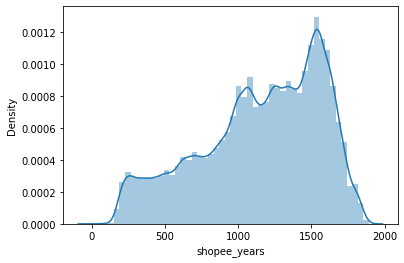

In [237]:
sns.distplot(Train['shopee_years'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

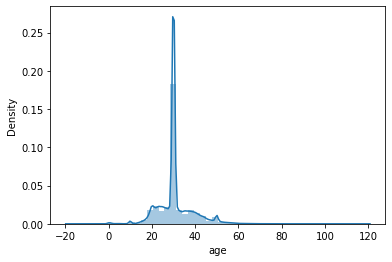

In [253]:
sns.distplot(Train['age'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='s1', ylabel='Density'>

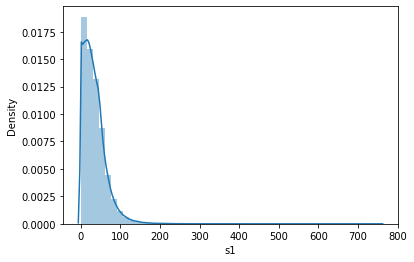

In [239]:
sns.distplot(Train['s1'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='s2', ylabel='Density'>

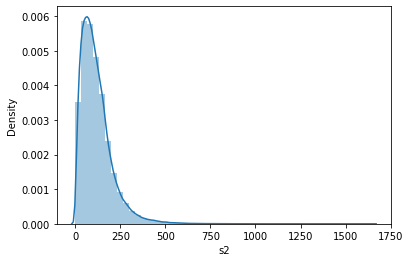

In [240]:
sns.distplot(Train['s2'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='order_count', ylabel='Density'>

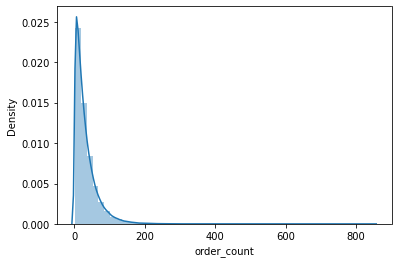

In [241]:
sns.distplot(Train['order_count'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='freq', ylabel='Density'>

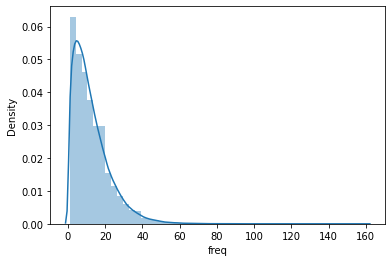

In [243]:
sns.distplot(Train['freq'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='last_login', ylabel='Density'>

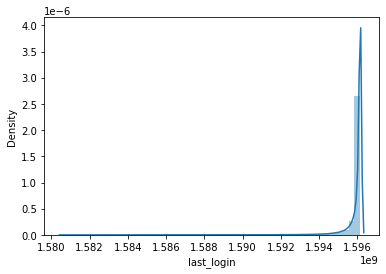

In [244]:
sns.distplot(Train['last_login'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_amount', ylabel='Density'>

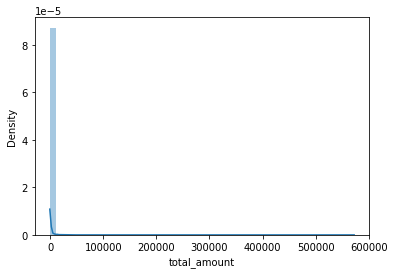

In [245]:
sns.distplot(Train['total_amount'])

In [263]:
# pt = preprocessing.PowerTransformer(method='box-cox')
# pt.fit_transform(Train[['age']])      

qt = preprocessing.QuantileTransformer(output_distribution='normal')
Train['age_pre'] = qt.fit_transform(Train[['age']])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age_pre', ylabel='Density'>

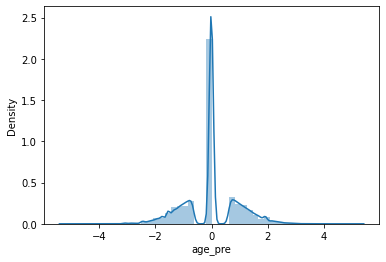

In [265]:
sns.distplot(Train['age_pre'])

In [270]:
Train.s1.describe()

count    426832.000000
mean         34.116756
std          28.373289
min           0.000000
25%          13.000000
50%          29.000000
75%          48.000000
max         756.000000
Name: s1, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='s1_pre', ylabel='Density'>

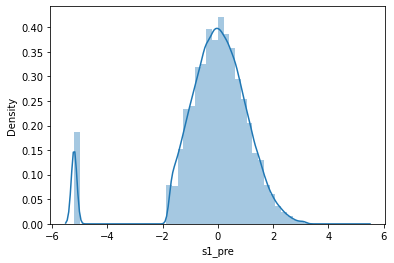

In [272]:
Train['s1_pre'] = qt.fit_transform(Train[['s1']])
sns.distplot(Train['s1_pre'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='s2_pre', ylabel='Density'>

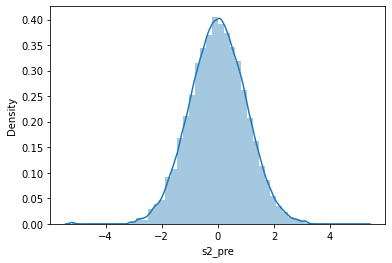

In [273]:
Train['s2_pre'] = qt.fit_transform(Train[['s2']])
sns.distplot(Train['s2_pre'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='order_count_pre', ylabel='Density'>

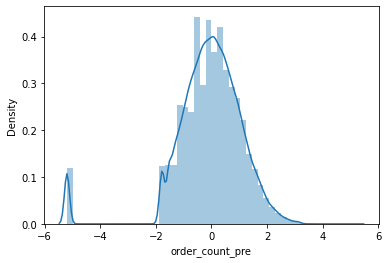

In [274]:
Train['order_count_pre'] = qt.fit_transform(Train[['order_count']])
sns.distplot(Train['order_count_pre'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_amount_pre', ylabel='Density'>

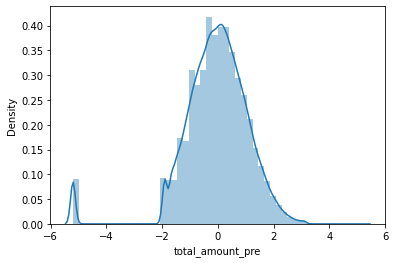

In [275]:
Train['total_amount_pre'] = qt.fit_transform(Train[['total_amount']])
sns.distplot(Train['total_amount_pre'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='freq_pre', ylabel='Density'>

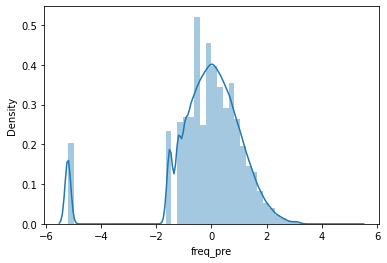

In [277]:
Train['freq_pre'] = qt.fit_transform(Train[['freq']])
sns.distplot(Train['freq_pre'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='last_login_pre', ylabel='Density'>

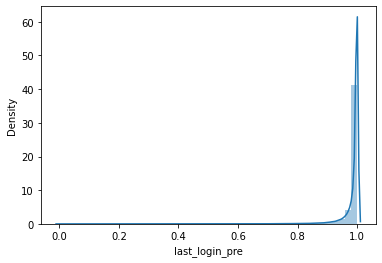

In [279]:
Train['last_login_pre'] = preprocessing.MinMaxScaler().fit_transform(Train[['last_login']])  
sns.distplot(Train['last_login_pre'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='shopee_years_pre', ylabel='Density'>

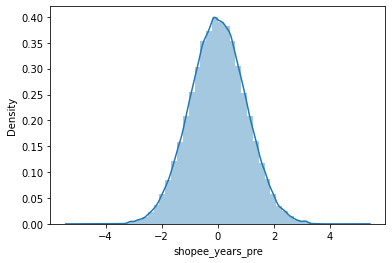

In [281]:
Train['shopee_years_pre'] = qt.fit_transform(Train[['shopee_years']])
sns.distplot(Train['shopee_years_pre'])

In [283]:
Train_pre = Train[['label','gender','is_seller', 's1_pre', 's2_pre', 'order_count_pre', 'total_amount_pre', 'freq_pre'
                  ,'last_login_pre', 'shopee_years_pre']]
Train_pre

,label,gender,is_seller,s1_pre,s2_pre,order_count_pre,total_amount_pre,freq_pre,last_login_pre,shopee_years_pre
0,0,1.0,0,0.118204,-1.321946,-1.197193,1.446104,-0.955471,0.933333,0.041413
1,1,1.0,1,0.265284,-0.744694,-0.305796,-0.644086,-0.151121,1.000000,0.549616
2,1,1.0,0,-0.146048,-0.213636,-0.108103,-0.448692,-0.282216,1.000000,-0.234219
3,0,2.0,1,1.194628,1.258508,1.464186,1.244778,1.016672,1.000000,0.492137
4,0,1.0,1,1.994971,1.644369,0.963423,0.658043,1.792374,1.000000,-1.577787
...,...,...,...,...,...,...,...,...,...,...
426827,0,1.0,1,-1.142483,-0.290058,-0.418371,-0.383024,-0.282216,0.994444,0.018820
426828,1,1.0,0,-0.645631,-1.236652,-0.548158,-0.734798,-0.151121,1.000000,-0.260089
426829,0,2.0,1,-0.494971,-0.434861,-0.203379,-0.142244,0.179102,1.000000,0.244548
426830,1,1.0,0,-5.199338,-3.089935,-5.199338,-5.199338,-5.199338,1.000000,-1.006211


In [34]:
Train['age'] = preprocessing.MinMaxScaler().fit_transform(Train[['age']]) 
Train['s1'] = preprocessing.MinMaxScaler().fit_transform(Train[['s1']]) 
Train['s2'] = preprocessing.MinMaxScaler().fit_transform(Train[['s2']]) 
Train['order_count'] = preprocessing.MinMaxScaler().fit_transform(Train[['order_count']]) 
Train['total_amount'] = preprocessing.MinMaxScaler().fit_transform(Train[['total_amount']]) 
Train['freq'] = preprocessing.MinMaxScaler().fit_transform(Train[['freq']]) 
Train['last_login'] = preprocessing.MinMaxScaler().fit_transform(Train[['last_login']])  
Train

,label,gender,is_seller,s1,s2,shopee_years,age,order_count,total_amount,freq,last_login
0,0,1.0,0,0.042328,0.016970,0.654151,0.277372,0.004711,0.000444,0.018868,0.933333
1,1,1.0,1,0.047619,0.031515,0.772607,0.350365,0.017668,0.000026,0.050314,1.000000
2,1,1.0,0,0.033069,0.050303,0.578001,0.372263,0.022379,0.000035,0.044025,1.000000
3,0,2.0,1,0.085979,0.133333,0.760973,0.386861,0.097762,0.000334,0.132075,1.000000
4,0,1.0,1,0.138889,0.170303,0.197250,0.138686,0.064782,0.000156,0.213836,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
426827,0,1.0,1,0.007937,0.047273,0.648863,0.350365,0.015312,0.000038,0.044025,0.994444
426828,1,1.0,0,0.018519,0.018788,0.572713,0.350365,0.012956,0.000023,0.050314,1.000000
426829,0,2.0,1,0.022487,0.041818,0.702803,0.423358,0.020024,0.000054,0.069182,1.000000
426830,1,1.0,0,0.000000,0.000606,0.354310,0.350365,0.000000,0.000000,0.000000,1.000000


In [287]:
data = Train_pre.sample(frac=0.95, random_state=123)
data_unseen = Train_pre.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (405490, 10)
Unseen Data For Predictions: (21342, 10)


In [288]:
data

,label,gender,is_seller,s1_pre,s2_pre,order_count_pre,total_amount_pre,freq_pre,last_login_pre,shopee_years_pre
0,0,1.0,0,-0.360172,-0.628724,0.377630,1.075207,-0.032625,0.955556,-1.021593
1,0,2.0,1,0.761353,1.758012,0.833781,0.573115,1.084195,1.000000,1.431971
2,1,2.0,0,1.169401,0.819656,2.023292,1.289578,1.994971,1.000000,0.973449
3,0,2.0,0,0.478025,1.280981,0.279606,0.421111,0.716839,1.000000,-0.824933
4,0,2.0,1,-5.199338,-2.033104,-0.959440,-0.074087,-1.509656,0.944444,-1.470321
...,...,...,...,...,...,...,...,...,...,...
405485,0,2.0,0,-0.146048,-1.154615,-1.197193,-1.381364,-0.752997,1.000000,-2.355061
405486,1,2.0,1,0.406079,0.321611,1.659093,2.110733,0.637923,1.000000,0.830234
405487,0,2.0,0,-1.414698,-1.858747,-1.525529,-1.669112,-1.197193,0.922222,-0.860120
405488,0,2.0,0,-0.933910,-0.128317,-0.253606,1.340200,-0.423855,0.994444,0.001255


In [289]:
data_unseen

,label,gender,is_seller,s1_pre,s2_pre,order_count_pre,total_amount_pre,freq_pre,last_login_pre,shopee_years_pre
0,1,2.0,0,1.037937,0.393847,0.736442,0.253606,1.629992,0.988889,1.242061
1,0,1.0,0,-0.360172,-0.703922,-1.343287,-1.381364,-1.509656,0.933333,-0.846279
2,0,2.0,1,1.517545,0.914679,1.283836,0.675277,1.343287,1.000000,1.286702
3,0,2.0,1,-0.404717,-0.724973,-1.525529,-1.669112,-1.509656,0.994444,1.018778
4,1,2.0,1,1.116369,1.064091,0.496390,0.148584,0.873515,1.000000,1.097845
...,...,...,...,...,...,...,...,...,...,...
21337,1,2.0,1,1.064091,1.176890,1.926403,1.439001,1.521525,1.000000,-0.042668
21338,0,2.0,0,-0.869846,-1.236652,0.244548,0.046436,-0.032625,1.000000,-0.949547
21339,0,1.0,0,-1.414698,-0.824933,-1.525529,-1.509656,-1.197193,0.816667,-1.577787
21340,1,2.0,1,0.265284,0.758004,-0.480839,0.099274,-0.579039,1.000000,0.849874


In [290]:
data_label = data[['label']]
data_label

,label
0,0
1,0
2,1
3,0
4,0
...,...
405485,0
405486,1
405487,0
405488,0


In [291]:
data = data.drop(['label'], axis=1)
data

,gender,is_seller,s1_pre,s2_pre,order_count_pre,total_amount_pre,freq_pre,last_login_pre,shopee_years_pre
0,1.0,0,-0.360172,-0.628724,0.377630,1.075207,-0.032625,0.955556,-1.021593
1,2.0,1,0.761353,1.758012,0.833781,0.573115,1.084195,1.000000,1.431971
2,2.0,0,1.169401,0.819656,2.023292,1.289578,1.994971,1.000000,0.973449
3,2.0,0,0.478025,1.280981,0.279606,0.421111,0.716839,1.000000,-0.824933
4,2.0,1,-5.199338,-2.033104,-0.959440,-0.074087,-1.509656,0.944444,-1.470321
...,...,...,...,...,...,...,...,...,...
405485,2.0,0,-0.146048,-1.154615,-1.197193,-1.381364,-0.752997,1.000000,-2.355061
405486,2.0,1,0.406079,0.321611,1.659093,2.110733,0.637923,1.000000,0.830234
405487,2.0,0,-1.414698,-1.858747,-1.525529,-1.669112,-1.197193,0.922222,-0.860120
405488,2.0,0,-0.933910,-0.128317,-0.253606,1.340200,-0.423855,0.994444,0.001255


In [292]:
data_unseen_label = data_unseen[['label']]
data_unseen_label

,label
0,1
1,0
2,0
3,0
4,1
...,...
21337,1
21338,0
21339,0
21340,1


In [293]:
data_unseen = data_unseen.drop(['label'], axis=1)
data_unseen

,gender,is_seller,s1_pre,s2_pre,order_count_pre,total_amount_pre,freq_pre,last_login_pre,shopee_years_pre
0,2.0,0,1.037937,0.393847,0.736442,0.253606,1.629992,0.988889,1.242061
1,1.0,0,-0.360172,-0.703922,-1.343287,-1.381364,-1.509656,0.933333,-0.846279
2,2.0,1,1.517545,0.914679,1.283836,0.675277,1.343287,1.000000,1.286702
3,2.0,1,-0.404717,-0.724973,-1.525529,-1.669112,-1.509656,0.994444,1.018778
4,2.0,1,1.116369,1.064091,0.496390,0.148584,0.873515,1.000000,1.097845
...,...,...,...,...,...,...,...,...,...
21337,2.0,1,1.064091,1.176890,1.926403,1.439001,1.521525,1.000000,-0.042668
21338,2.0,0,-0.869846,-1.236652,0.244548,0.046436,-0.032625,1.000000,-0.949547
21339,1.0,0,-1.414698,-0.824933,-1.525529,-1.509656,-1.197193,0.816667,-1.577787
21340,2.0,1,0.265284,0.758004,-0.480839,0.099274,-0.579039,1.000000,0.849874


In [294]:
data.gender = data.gender.astype(int)
data.is_seller = data.is_setest_dfller.astype(int)
data

,gender,is_seller,s1_pre,s2_pre,order_count_pre,total_amount_pre,freq_pre,last_login_pre,shopee_years_pre
0,1,0,-0.360172,-0.628724,0.377630,1.075207,-0.032625,0.955556,-1.021593
1,2,1,0.761353,1.758012,0.833781,0.573115,1.084195,1.000000,1.431971
2,2,0,1.169401,0.819656,2.023292,1.289578,1.994971,1.000000,0.973449
3,2,0,0.478025,1.280981,0.279606,0.421111,0.716839,1.000000,-0.824933
4,2,1,-5.199338,-2.033104,-0.959440,-0.074087,-1.509656,0.944444,-1.470321
...,...,...,...,...,...,...,...,...,...
405485,2,0,-0.146048,-1.154615,-1.197193,-1.381364,-0.752997,1.000000,-2.355061
405486,2,1,0.406079,0.321611,1.659093,2.110733,0.637923,1.000000,0.830234
405487,2,0,-1.414698,-1.858747,-1.525529,-1.669112,-1.197193,0.922222,-0.860120
405488,2,0,-0.933910,-0.128317,-0.253606,1.340200,-0.423855,0.994444,0.001255


In [295]:
data_unseen.is_seller = data_unseen.is_seller.astype(int)
data_unseen.gender = data_unseen.gender.astype(int)
data_unseen

,gender,is_seller,s1_pre,s2_pre,order_count_pre,total_amount_pre,freq_pre,last_login_pre,shopee_years_pre
0,2,0,1.037937,0.393847,0.736442,0.253606,1.629992,0.988889,1.242061
1,1,0,-0.360172,-0.703922,-1.343287,-1.381364,-1.509656,0.933333,-0.846279
2,2,1,1.517545,0.914679,1.283836,0.675277,1.343287,1.000000,1.286702
3,2,1,-0.404717,-0.724973,-1.525529,-1.669112,-1.509656,0.994444,1.018778
4,2,1,1.116369,1.064091,0.496390,0.148584,0.873515,1.000000,1.097845
...,...,...,...,...,...,...,...,...,...
21337,2,1,1.064091,1.176890,1.926403,1.439001,1.521525,1.000000,-0.042668
21338,2,0,-0.869846,-1.236652,0.244548,0.046436,-0.032625,1.000000,-0.949547
21339,1,0,-1.414698,-0.824933,-1.525529,-1.509656,-1.197193,0.816667,-1.577787
21340,2,1,0.265284,0.758004,-0.480839,0.099274,-0.579039,1.000000,0.849874


In [296]:
cat_feature = data[['gender','is_seller']]
cat_feature

,gender,is_seller
0,1,0
1,2,1
2,2,0
3,2,0
4,2,1
...,...,...
405485,2,0
405486,2,1
405487,2,0
405488,2,0


In [297]:
# Initialize CatBoostClassifier
model = CatBoostClassifier(iterations=1000,
                           learning_rate=0.015,
                           random_seed=12,
                           depth=10,
                          eval_metric='AUC',
                           loss_function='Logloss',
                           l2_leaf_reg=25, 
                           early_stopping_rounds=50)

In [298]:
cat_unseen_feature = data_unseen[['gender','is_seller']]
cat_unseen_feature

,gender,is_seller
0,2,0
1,1,0
2,2,1
3,2,1
4,2,1
...,...,...
21337,2,1
21338,2,0
21339,1,0
21340,2,1


In [299]:
eval_dataset = Pool(data_unseen,
                    data_unseen_label,cat_unseen_feature)

In [300]:
model.fit(data,
          data_label,cat_features = cat_feature, eval_set=eval_dataset)

0:	test: 0.6808390	best: 0.6808390 (0)	total: 29.6ms	remaining: 29.6s
1:	test: 0.6824495	best: 0.6824495 (1)	total: 80ms	remaining: 39.9s
2:	test: 0.6836729	best: 0.6836729 (2)	total: 130ms	remaining: 43.2s
3:	test: 0.6857149	best: 0.6857149 (3)	total: 177ms	remaining: 44.1s
4:	test: 0.6862131	best: 0.6862131 (4)	total: 237ms	remaining: 47.1s
5:	test: 0.6873160	best: 0.6873160 (5)	total: 292ms	remaining: 48.4s
6:	test: 0.6877105	best: 0.6877105 (6)	total: 343ms	remaining: 48.7s
7:	test: 0.6881329	best: 0.6881329 (7)	total: 393ms	remaining: 48.7s
8:	test: 0.6884443	best: 0.6884443 (8)	total: 445ms	remaining: 49s
9:	test: 0.6882625	best: 0.6884443 (8)	total: 498ms	remaining: 49.3s
10:	test: 0.6885997	best: 0.6885997 (10)	total: 552ms	remaining: 49.7s
11:	test: 0.6884885	best: 0.6885997 (10)	total: 605ms	remaining: 49.8s
12:	test: 0.6887146	best: 0.6887146 (12)	total: 664ms	remaining: 50.4s
13:	test: 0.6887962	best: 0.6887962 (13)	total: 721ms	remaining: 50.8s
14:	test: 0.6889518	best: 0.

120:	test: 0.6921246	best: 0.6921246 (120)	total: 6.41s	remaining: 46.5s
121:	test: 0.6921537	best: 0.6921537 (121)	total: 6.47s	remaining: 46.6s
122:	test: 0.6921931	best: 0.6921931 (122)	total: 6.54s	remaining: 46.6s
123:	test: 0.6922187	best: 0.6922187 (123)	total: 6.6s	remaining: 46.6s
124:	test: 0.6922298	best: 0.6922298 (124)	total: 6.67s	remaining: 46.7s
125:	test: 0.6922658	best: 0.6922658 (125)	total: 6.74s	remaining: 46.8s
126:	test: 0.6922658	best: 0.6922658 (126)	total: 6.8s	remaining: 46.7s
127:	test: 0.6923255	best: 0.6923255 (127)	total: 6.87s	remaining: 46.8s
128:	test: 0.6923257	best: 0.6923257 (128)	total: 6.95s	remaining: 46.9s
129:	test: 0.6923455	best: 0.6923455 (129)	total: 7.02s	remaining: 47s
130:	test: 0.6923848	best: 0.6923848 (130)	total: 7.08s	remaining: 47s
131:	test: 0.6924268	best: 0.6924268 (131)	total: 7.13s	remaining: 46.9s
132:	test: 0.6924464	best: 0.6924464 (132)	total: 7.19s	remaining: 46.9s
133:	test: 0.6924737	best: 0.6924737 (133)	total: 7.27s	r

236:	test: 0.6937235	best: 0.6937235 (236)	total: 13.5s	remaining: 43.6s
237:	test: 0.6937348	best: 0.6937348 (237)	total: 13.6s	remaining: 43.5s
238:	test: 0.6937507	best: 0.6937507 (238)	total: 13.6s	remaining: 43.4s
239:	test: 0.6937654	best: 0.6937654 (239)	total: 13.7s	remaining: 43.4s
240:	test: 0.6937710	best: 0.6937710 (240)	total: 13.7s	remaining: 43.3s
241:	test: 0.6937748	best: 0.6937748 (241)	total: 13.8s	remaining: 43.3s
242:	test: 0.6937781	best: 0.6937781 (242)	total: 13.9s	remaining: 43.3s
243:	test: 0.6937935	best: 0.6937935 (243)	total: 14s	remaining: 43.3s
244:	test: 0.6938062	best: 0.6938062 (244)	total: 14s	remaining: 43.3s
245:	test: 0.6938090	best: 0.6938090 (245)	total: 14.1s	remaining: 43.3s
246:	test: 0.6938139	best: 0.6938139 (246)	total: 14.2s	remaining: 43.3s
247:	test: 0.6938304	best: 0.6938304 (247)	total: 14.3s	remaining: 43.2s
248:	test: 0.6938396	best: 0.6938396 (248)	total: 14.3s	remaining: 43.2s
249:	test: 0.6938484	best: 0.6938484 (249)	total: 14.4s

350:	test: 0.6944649	best: 0.6944649 (350)	total: 20.5s	remaining: 37.8s
351:	test: 0.6944649	best: 0.6944649 (351)	total: 20.5s	remaining: 37.8s
352:	test: 0.6944641	best: 0.6944649 (351)	total: 20.6s	remaining: 37.7s
353:	test: 0.6944631	best: 0.6944649 (351)	total: 20.6s	remaining: 37.7s
354:	test: 0.6944696	best: 0.6944696 (354)	total: 20.7s	remaining: 37.6s
355:	test: 0.6944728	best: 0.6944728 (355)	total: 20.8s	remaining: 37.6s
356:	test: 0.6944907	best: 0.6944907 (356)	total: 20.8s	remaining: 37.5s
357:	test: 0.6944994	best: 0.6944994 (357)	total: 20.9s	remaining: 37.5s
358:	test: 0.6945018	best: 0.6945018 (358)	total: 20.9s	remaining: 37.4s
359:	test: 0.6945031	best: 0.6945031 (359)	total: 21s	remaining: 37.3s
360:	test: 0.6945050	best: 0.6945050 (360)	total: 21.1s	remaining: 37.3s
361:	test: 0.6945185	best: 0.6945185 (361)	total: 21.1s	remaining: 37.3s
362:	test: 0.6945263	best: 0.6945263 (362)	total: 21.2s	remaining: 37.2s
363:	test: 0.6945235	best: 0.6945263 (362)	total: 21.

466:	test: 0.6948026	best: 0.6948055 (465)	total: 27.5s	remaining: 31.4s
467:	test: 0.6948177	best: 0.6948177 (467)	total: 27.6s	remaining: 31.4s
468:	test: 0.6948176	best: 0.6948177 (467)	total: 27.6s	remaining: 31.3s
469:	test: 0.6948158	best: 0.6948177 (467)	total: 27.7s	remaining: 31.2s
470:	test: 0.6948255	best: 0.6948255 (470)	total: 27.8s	remaining: 31.2s
471:	test: 0.6948257	best: 0.6948257 (471)	total: 27.8s	remaining: 31.1s
472:	test: 0.6948269	best: 0.6948269 (472)	total: 27.9s	remaining: 31.1s
473:	test: 0.6948294	best: 0.6948294 (473)	total: 27.9s	remaining: 31s
474:	test: 0.6948305	best: 0.6948305 (474)	total: 28s	remaining: 31s
475:	test: 0.6948316	best: 0.6948316 (475)	total: 28.1s	remaining: 30.9s
476:	test: 0.6948328	best: 0.6948328 (476)	total: 28.1s	remaining: 30.9s
477:	test: 0.6948319	best: 0.6948328 (476)	total: 28.2s	remaining: 30.8s
478:	test: 0.6948157	best: 0.6948328 (476)	total: 28.3s	remaining: 30.7s
479:	test: 0.6948177	best: 0.6948328 (476)	total: 28.3s	r

582:	test: 0.6949597	best: 0.6949634 (570)	total: 34.5s	remaining: 24.6s
583:	test: 0.6949639	best: 0.6949639 (583)	total: 34.5s	remaining: 24.6s
584:	test: 0.6949573	best: 0.6949639 (583)	total: 34.6s	remaining: 24.5s
585:	test: 0.6949589	best: 0.6949639 (583)	total: 34.6s	remaining: 24.5s
586:	test: 0.6949584	best: 0.6949639 (583)	total: 34.7s	remaining: 24.4s
587:	test: 0.6949613	best: 0.6949639 (583)	total: 34.8s	remaining: 24.4s
588:	test: 0.6949613	best: 0.6949639 (583)	total: 34.8s	remaining: 24.3s
589:	test: 0.6949591	best: 0.6949639 (583)	total: 34.9s	remaining: 24.2s
590:	test: 0.6949591	best: 0.6949639 (583)	total: 34.9s	remaining: 24.2s
591:	test: 0.6949539	best: 0.6949639 (583)	total: 35s	remaining: 24.1s
592:	test: 0.6949558	best: 0.6949639 (583)	total: 35.1s	remaining: 24.1s
593:	test: 0.6949520	best: 0.6949639 (583)	total: 35.1s	remaining: 24s
594:	test: 0.6949505	best: 0.6949639 (583)	total: 35.2s	remaining: 23.9s
595:	test: 0.6949532	best: 0.6949639 (583)	total: 35.2s

695:	test: 0.6949805	best: 0.6949930 (675)	total: 41.2s	remaining: 18s
696:	test: 0.6949727	best: 0.6949930 (675)	total: 41.2s	remaining: 17.9s
697:	test: 0.6949669	best: 0.6949930 (675)	total: 41.3s	remaining: 17.9s
698:	test: 0.6949690	best: 0.6949930 (675)	total: 41.3s	remaining: 17.8s
699:	test: 0.6949637	best: 0.6949930 (675)	total: 41.4s	remaining: 17.7s
700:	test: 0.6949664	best: 0.6949930 (675)	total: 41.4s	remaining: 17.7s
701:	test: 0.6949686	best: 0.6949930 (675)	total: 41.5s	remaining: 17.6s
702:	test: 0.6949647	best: 0.6949930 (675)	total: 41.6s	remaining: 17.6s
703:	test: 0.6949631	best: 0.6949930 (675)	total: 41.6s	remaining: 17.5s
704:	test: 0.6949661	best: 0.6949930 (675)	total: 41.7s	remaining: 17.4s
705:	test: 0.6949719	best: 0.6949930 (675)	total: 41.7s	remaining: 17.4s
706:	test: 0.6949690	best: 0.6949930 (675)	total: 41.8s	remaining: 17.3s
707:	test: 0.6949719	best: 0.6949930 (675)	total: 41.9s	remaining: 17.3s
708:	test: 0.6949732	best: 0.6949930 (675)	total: 41.

In [212]:
# # Initialize CatBoostClassifier
# model1 = CatBoostClassifier(iterations=500,
#                            learning_rate=0.0015,
#                            random_seed=12,
#                            depth=10,
#                           eval_metric='AUC',
#                            loss_function='Logloss',
#                            l2_leaf_reg=50, 
#                            early_stopping_rounds=50)
# model1.fit(data, data_label,cat_features = cat_feature, eval_set=eval_dataset,init_model=model)


0:	test: 0.6926252	best: 0.6926252 (0)	total: 50.7ms	remaining: 25.3s
1:	test: 0.6926253	best: 0.6926253 (1)	total: 97.8ms	remaining: 24.3s
2:	test: 0.6926251	best: 0.6926253 (1)	total: 148ms	remaining: 24.5s
3:	test: 0.6926252	best: 0.6926253 (1)	total: 197ms	remaining: 24.4s
4:	test: 0.6926253	best: 0.6926253 (4)	total: 246ms	remaining: 24.3s
5:	test: 0.6926250	best: 0.6926253 (4)	total: 303ms	remaining: 25s
6:	test: 0.6926249	best: 0.6926253 (4)	total: 350ms	remaining: 24.6s
7:	test: 0.6926251	best: 0.6926253 (4)	total: 396ms	remaining: 24.4s
8:	test: 0.6926251	best: 0.6926253 (4)	total: 449ms	remaining: 24.5s
9:	test: 0.6926253	best: 0.6926253 (4)	total: 498ms	remaining: 24.4s
10:	test: 0.6926251	best: 0.6926253 (4)	total: 553ms	remaining: 24.6s
11:	test: 0.6926253	best: 0.6926253 (11)	total: 602ms	remaining: 24.5s
12:	test: 0.6926256	best: 0.6926256 (12)	total: 650ms	remaining: 24.4s
13:	test: 0.6926252	best: 0.6926256 (12)	total: 698ms	remaining: 24.2s
14:	test: 0.6926256	best: 0

119:	test: 0.6926300	best: 0.6926307 (88)	total: 6.06s	remaining: 19.2s
120:	test: 0.6926301	best: 0.6926307 (88)	total: 6.11s	remaining: 19.1s
121:	test: 0.6926303	best: 0.6926307 (88)	total: 6.16s	remaining: 19.1s
122:	test: 0.6926301	best: 0.6926307 (88)	total: 6.2s	remaining: 19s
123:	test: 0.6926300	best: 0.6926307 (88)	total: 6.25s	remaining: 18.9s
124:	test: 0.6926301	best: 0.6926307 (88)	total: 6.3s	remaining: 18.9s
125:	test: 0.6926299	best: 0.6926307 (88)	total: 6.34s	remaining: 18.8s
126:	test: 0.6926296	best: 0.6926307 (88)	total: 6.39s	remaining: 18.8s
127:	test: 0.6926295	best: 0.6926307 (88)	total: 6.44s	remaining: 18.7s
128:	test: 0.6926295	best: 0.6926307 (88)	total: 6.49s	remaining: 18.7s
129:	test: 0.6926295	best: 0.6926307 (88)	total: 6.54s	remaining: 18.6s
130:	test: 0.6926298	best: 0.6926307 (88)	total: 6.59s	remaining: 18.6s
131:	test: 0.6926297	best: 0.6926307 (88)	total: 6.64s	remaining: 18.5s
132:	test: 0.6926295	best: 0.6926307 (88)	total: 6.71s	remaining: 18

In [170]:
# model = model1

In [301]:
print(model.get_best_iteration())

675


In [302]:
test_df = pd.read_csv('submission.csv')
test_df

,userid
0,100352
1,306318
2,35311
3,346391
4,448953
...,...
75320,352208
75321,80927
75322,428302
75323,291739


In [303]:
test_df = pd.merge(test_df, all_df, on='userid').set_index('userid')
test_df

,gender,is_seller,s1,s2,shopee_years,age,order_count,total_amount,freq,last_login
userid,,,,,,,,,,
100352,2.0,1,149,574,1545.0,31.0,99,203,36,1.596154e+09
306318,2.0,0,44,174,1093.0,NaN,117,131,35,1.596154e+09
35311,2.0,1,107,277,1665.0,37.0,55,537,17,1.596154e+09
346391,2.0,0,26,201,1004.0,NaN,47,360,22,1.596154e+09
448953,1.0,0,12,38,621.0,18.0,1,1,1,1.596154e+09
...,...,...,...,...,...,...,...,...,...,...
352208,1.0,0,7,42,989.0,NaN,15,23,8,1.595808e+09
80927,2.0,1,57,139,1573.0,NaN,81,85,25,1.596154e+09
428302,2.0,0,18,60,709.0,19.0,56,72,6,1.596154e+09


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

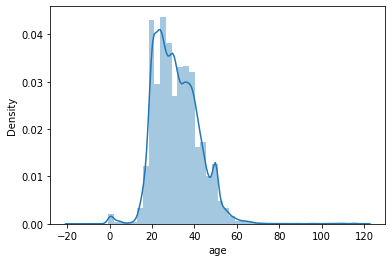

In [307]:
sns.distplot(test_df['age'])

In [308]:
test_df['age_pre'] = qt.fit_transform(test_df[['age']])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age_pre', ylabel='Density'>

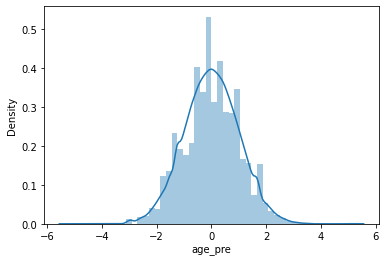

In [310]:
sns.distplot(test_df['age_pre'])

In [311]:
test_df.loc[(test_df['age_pre'].isnull()), 'age_pre'] = 0
test_df.loc[(test_df['gender'].isnull()), 'gender'] = 2.0

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='shopee_years_pre', ylabel='Density'>

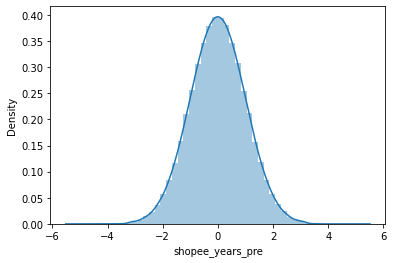

In [312]:
test_df['shopee_years_pre'] = qt.fit_transform(test_df[['shopee_years']])
sns.distplot(test_df['shopee_years_pre'])

In [313]:
test_df['s1_pre'] = qt.fit_transform(test_df[['s1']])
test_df['s2_pre'] = qt.fit_transform(test_df[['s2']])
test_df['order_count_pre'] = qt.fit_transform(test_df[['order_count']])
test_df['total_amount_pre'] = qt.fit_transform(test_df[['total_amount']])
test_df['freq_pre'] = qt.fit_transform(test_df[['freq']])
test_df['last_login_pre'] = preprocessing.MinMaxScaler().fit_transform(test_df[['last_login']])  
test_df

,gender,is_seller,s1,s2,shopee_years,age,order_count,total_amount,freq,last_login,age_pre,shopee_years_pre,s1_pre,s2_pre,order_count_pre,total_amount_pre,freq_pre,last_login_pre
userid,,,,,,,,,,,,,,,,,,
100352,2.0,1,149,574,1545.0,31.0,99,203,36,1.596154e+09,0.074087,0.866189,2.537836,2.795516,1.694923,1.298271,1.865852,1.000000
306318,2.0,0,44,174,1093.0,NaN,117,131,35,1.596154e+09,0.000000,-0.240671,0.548158,0.880888,1.918441,0.961429,1.817968,1.000000
35311,2.0,1,107,277,1665.0,37.0,55,537,17,1.596154e+09,0.555462,1.490335,2.013671,1.634747,0.939747,1.860761,0.645631,1.000000
346391,2.0,0,26,201,1004.0,NaN,47,360,22,1.596154e+09,0.000000,-0.441766,-0.105580,1.118711,0.758004,1.667431,1.027247,1.000000
448953,1.0,0,12,38,621.0,18.0,1,1,1,1.596154e+09,-1.705570,-1.103977,-0.754664,-1.055293,-5.199338,-5.199338,-5.199338,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352208,1.0,0,7,42,989.0,NaN,15,23,8,1.595808e+09,0.000000,-0.480839,-1.066304,-0.959440,-0.364191,-0.395204,-0.283522,0.977901
80927,2.0,1,57,139,1573.0,NaN,81,85,25,1.596154e+09,0.000000,1.006211,0.981540,0.503497,1.428482,0.611996,1.228607,1.000000
428302,2.0,0,18,60,709.0,19.0,56,72,6,1.596154e+09,-1.505747,-0.943004,-0.452858,-0.593940,0.963423,0.476619,-0.577557,1.000000


In [325]:
test_df_pre = test_df[['gender','is_seller', 's1_pre', 's2_pre', 'order_count_pre', 'total_amount_pre', 'freq_pre'
                  ,'last_login_pre', 'shopee_years_pre']]

test_df_pre



,gender,is_seller,s1_pre,s2_pre,order_count_pre,total_amount_pre,freq_pre,last_login_pre,shopee_years_pre
userid,,,,,,,,,
100352,2.0,1,2.537836,2.795516,1.694923,1.298271,1.865852,1.000000,0.866189
306318,2.0,0,0.548158,0.880888,1.918441,0.961429,1.817968,1.000000,-0.240671
35311,2.0,1,2.013671,1.634747,0.939747,1.860761,0.645631,1.000000,1.490335
346391,2.0,0,-0.105580,1.118711,0.758004,1.667431,1.027247,1.000000,-0.441766
448953,1.0,0,-0.754664,-1.055293,-5.199338,-5.199338,-5.199338,1.000000,-1.103977
...,...,...,...,...,...,...,...,...,...
352208,1.0,0,-1.066304,-0.959440,-0.364191,-0.395204,-0.283522,0.977901,-0.480839
80927,2.0,1,0.981540,0.503497,1.428482,0.611996,1.228607,1.000000,1.006211
428302,2.0,0,-0.452858,-0.593940,0.963423,0.476619,-0.577557,1.000000,-0.943004


In [62]:
test_df['shopee_years'] = preprocessing.MinMaxScaler().fit_transform(test_df[['shopee_years']]) 
test_df['age'] = preprocessing.MinMaxScaler().fit_transform(test_df[['age']]) 
test_df['s1'] = preprocessing.MinMaxScaler().fit_transform(test_df[['s1']]) 
test_df['s2'] = preprocessing.MinMaxScaler().fit_transform(test_df[['s2']]) 
test_df['order_count'] = preprocessing.MinMaxScaler().fit_transform(test_df[['order_count']]) 
test_df['total_amount'] = preprocessing.MinMaxScaler().fit_transform(test_df[['total_amount']]) 
test_df['freq'] = preprocessing.MinMaxScaler().fit_transform(test_df[['freq']]) 
test_df['last_login'] = preprocessing.MinMaxScaler().fit_transform(test_df[['last_login']])  
test_df

,gender,is_seller,s1,s2,shopee_years,age,order_count,total_amount,freq,last_login
userid,,,,,,,,,,
100352,2.0,1,0.366093,0.465531,0.809654,0.352941,0.083689,0.000501,0.312500,1.000000
306318,2.0,0,0.108108,0.141119,0.561711,0.345588,0.099061,0.000323,0.303571,1.000000
35311,2.0,1,0.262899,0.224655,0.875480,0.397059,0.046114,0.001330,0.142857,1.000000
346391,2.0,0,0.063882,0.163017,0.512891,0.345588,0.039283,0.000891,0.187500,1.000000
448953,1.0,0,0.029484,0.030819,0.302798,0.257353,0.000000,0.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...
352208,1.0,0,0.017199,0.034063,0.504663,0.345588,0.011956,0.000055,0.062500,0.977901
80927,2.0,1,0.140049,0.112733,0.825014,0.345588,0.068318,0.000208,0.214286,1.000000
428302,2.0,0,0.044226,0.048662,0.351070,0.264706,0.046968,0.000176,0.044643,1.000000


In [326]:
test_df_pre.is_seller = test_df_pre.is_seller.astype(int)
test_df_pre.gender = test_df_pre.gender.astype(int)
test_cat_feature = test_df_pre[['gender','is_seller']]
test_cat_feature

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,gender,is_seller
userid,,
100352,2,1
306318,2,0
35311,2,1
346391,2,0
448953,1,0
...,...,...
352208,1,0
80927,2,1
428302,2,0


In [328]:
test_dataset = Pool(test_df_pre,cat_features = test_cat_feature)
test_dataset

In [329]:
preds = model.predict(test_dataset)
preds

array([1, 1, 0, ..., 0, 0, 0])

In [330]:
ans = pd.DataFrame(preds, columns=['label'])
ans

,label
0,1
1,1
2,0
3,1
4,0
...,...
75320,0
75321,1
75322,0
75323,0


In [227]:
ans_df = pd.read_csv('submission.csv')
ans_df

,userid
0,100352
1,306318
2,35311
3,346391
4,448953
...,...
75320,352208
75321,80927
75322,428302
75323,291739


In [228]:
ans_df = ans_df.join(ans)
ans_df

,userid,label
0,100352,1
1,306318,1
2,35311,1
3,346391,1
4,448953,0
...,...,...
75320,352208,0
75321,80927,1
75322,428302,0
75323,291739,0


In [229]:
ans_df.set_index('userid', inplace=True)
ans_df

,label
userid,
100352,1
306318,1
35311,1
346391,1
448953,0
...,...
352208,0
80927,1
428302,0


In [230]:
ans_df.to_csv('submission_out_v4.csv')